<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Sleep_Health_Lifestyle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head(11)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
df.tail(11)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
363,364,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
366,367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,368,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [14]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0])

In [17]:
df.duplicated().sum()

np.int64(0)

# Handling Outliers

In [18]:
# Calculate the IQR for a numerical column (replace 'ColumnName' with the actual column name)
Q1 = df['Physical Activity Level'].quantile(0.25)
Q3 = df['Physical Activity Level'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Physical Activity Level'] >= lower_bound) & (df['Physical Activity Level'] <= upper_bound)]

# Alternatively, you can cap the outliers
df['Physical Activity Level'] = df['Physical Activity Level'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

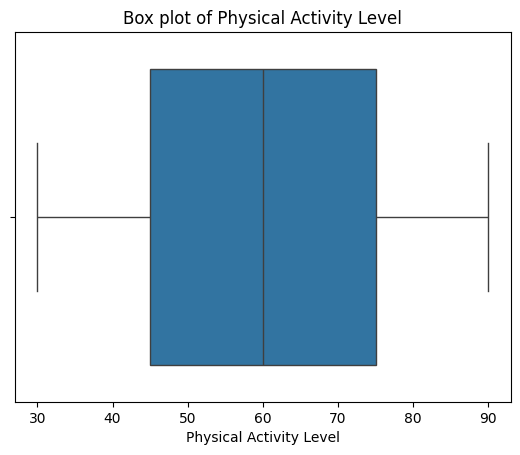

In [20]:
sns.boxplot(x=df['Physical Activity Level'])
plt.title('Box plot of Physical Activity Level')
plt.show()

# Univariate Analysis

In [22]:
df['Physical Activity Level'].value_counts()

,count
Physical Activity Level,
60,70
30,68
45,68
75,67
90,67
40,6
55,6
35,4
50,4


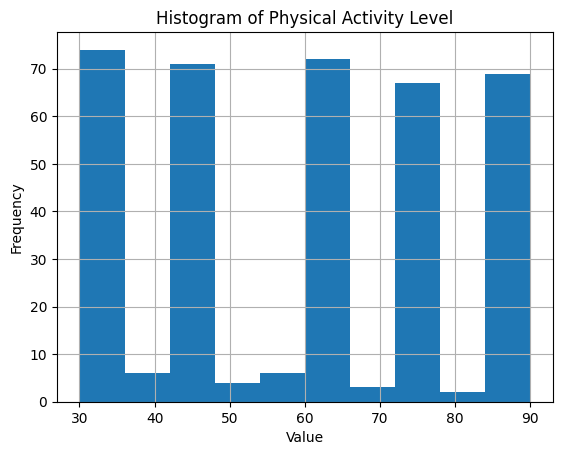

In [24]:
# Histogram

df['Physical Activity Level'].hist()
plt.title('Histogram of Physical Activity Level')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

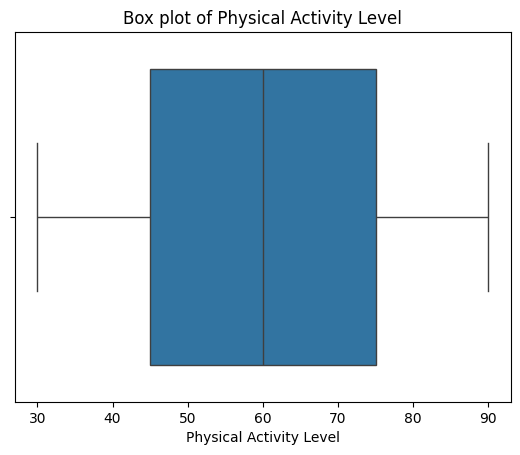

In [25]:
# Box Plots:

sns.boxplot(x=df['Physical Activity Level'])
plt.title('Box plot of Physical Activity Level')
plt.show()

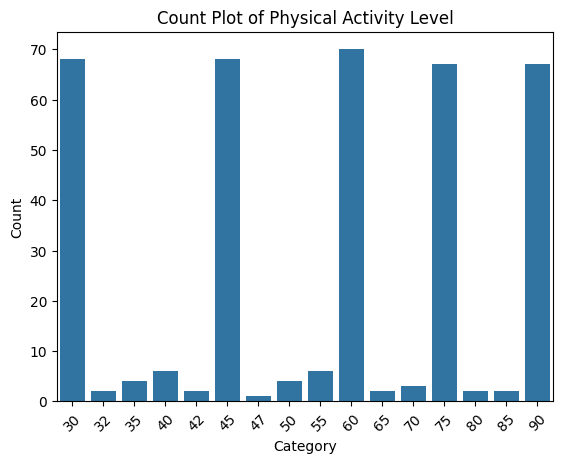

In [27]:
# Count Plots:

sns.countplot(x='Physical Activity Level', data=df)
plt.title('Count Plot of Physical Activity Level')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate labels if they overlap
plt.show()

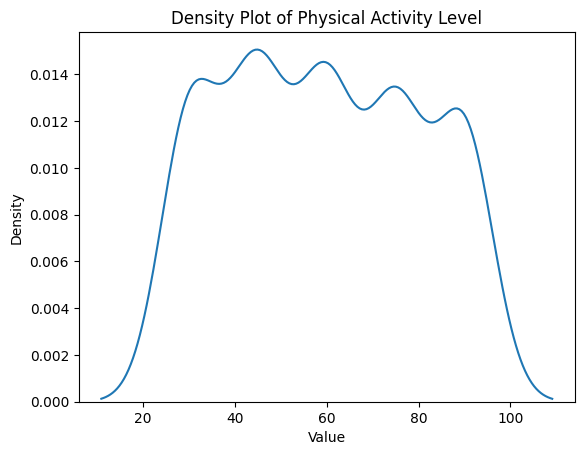

In [29]:
# Density Plots (KDE Plots)

sns.kdeplot(df['Physical Activity Level'])
plt.title('Density Plot of Physical Activity Level')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Bivariate Analysis

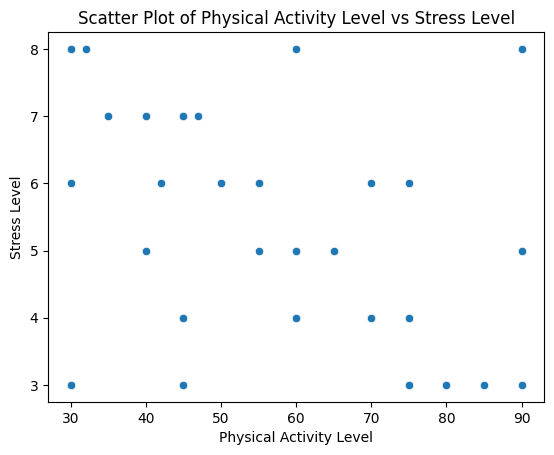

In [31]:
# Scatter Plots (for two numerical variables):

sns.scatterplot(x='Physical Activity Level', y='Stress Level', data=df)
plt.title('Scatter Plot of Physical Activity Level vs Stress Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.show()

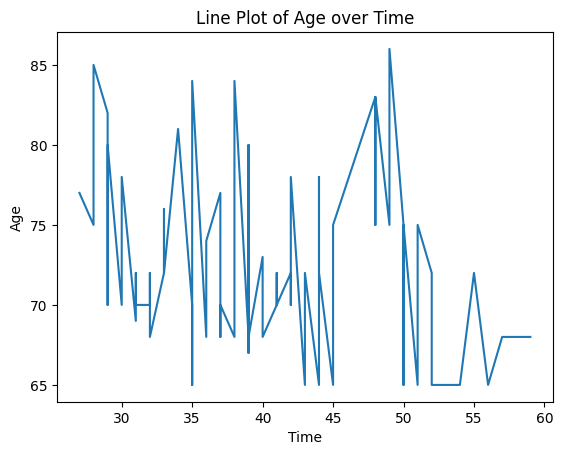

In [36]:
#  Line Plots:

plt.plot(df['Age'], df['Heart Rate'])
plt.title('Line Plot of Age over Time')
plt.xlabel('Time')
plt.ylabel('Age')
plt.show()

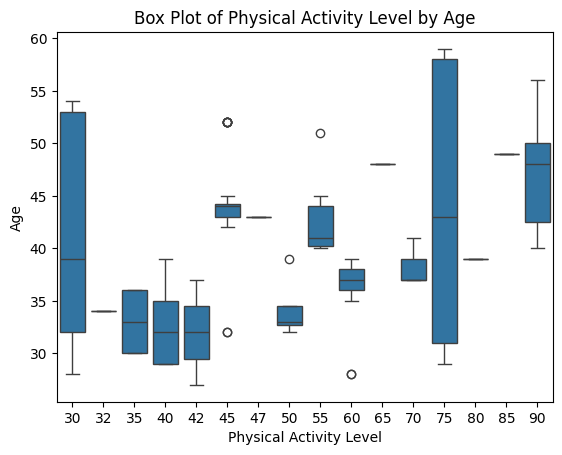

In [37]:
#  Box Plots:

sns.boxplot(x='Physical Activity Level', y='Age', data=df)
plt.title('Box Plot of Physical Activity Level by Age')
plt.xlabel('Physical Activity Level')
plt.ylabel('Age')
plt.show()

# Visualization

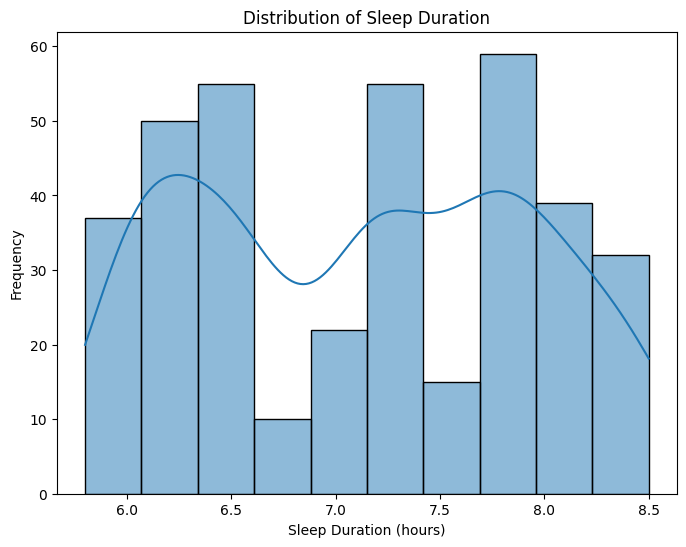

In [47]:
# Visualization 1: Distribution of Sleep Duration (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sleep Duration', kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

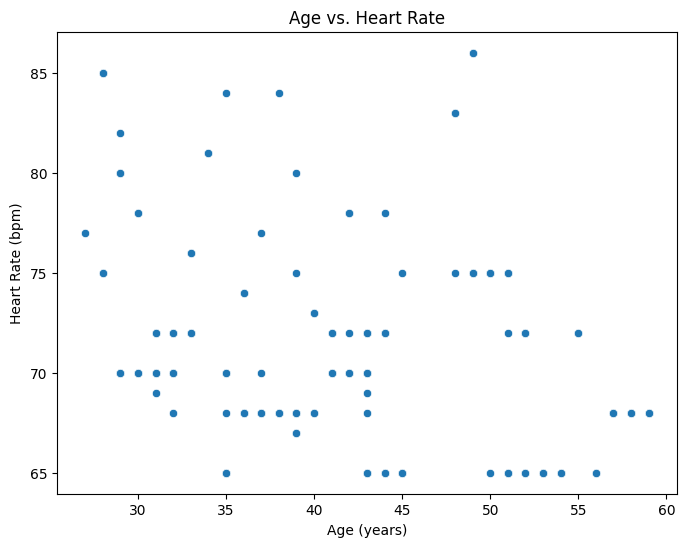

In [46]:
# Visualization 2: Relationship between Age and Heart Rate (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Heart Rate')
plt.title('Age vs. Heart Rate')
plt.xlabel('Age (years)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

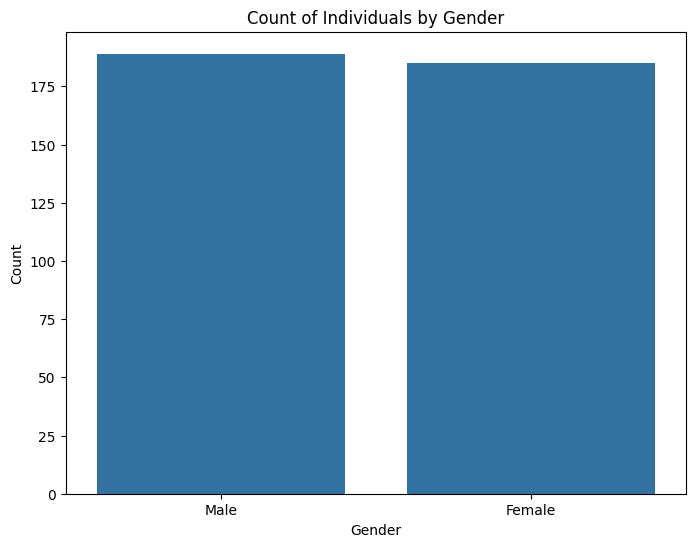

In [45]:
# Visualization 3: Count of individuals by Gender (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

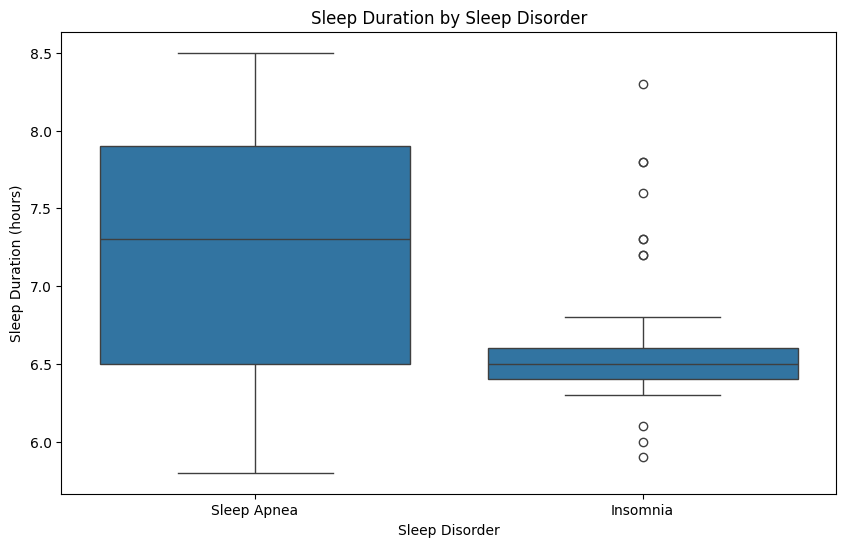

In [44]:
# Visualization 4: Sleep Duration by Sleep Disorder (Box Plot)
# Ensure 'Sleep Disorder' is treated as a categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sleep Disorder', y='Sleep Duration')
plt.title('Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.show()

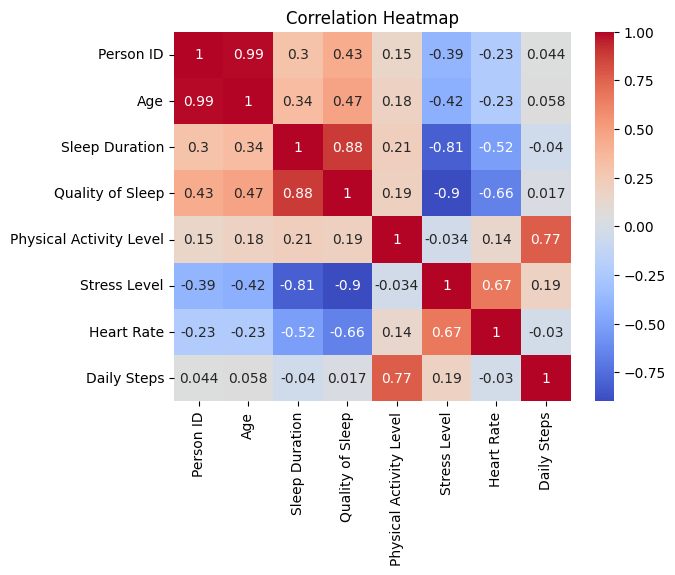

In [39]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Thank you